In [9]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

import seaborn as sns

In [2]:
pd.options.display.max_rows = 10

In [5]:
h5_dir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\h5 files\\mmabmTests\\'
h5_file = 'abmga_%d.h5' % 51
h5in = '%s%s' % (h5_dir, h5_file)

## Tables
### Exchange: trades, orders, tob
### MarketMakerL: signal_3000, mmp
### Runner: qtl

In [4]:
accuracy = 'signal_%d' % 3000

In [6]:
mmdf = pd.read_hdf(h5in, accuracy)
mmdf

,OIAcc,OICond,OIStr,OIStrat,OIV,Step
0,0.000000,222222222222222222222222,000001100000000001100000,0,0,21
1,15.680000,222222222022222222222222,000001100000000001100000,28,0,21
2,0.320000,222222222222222222222222,000001100000000001100000,4,0,21
3,0.080000,222222222222222222222222,000001100000000001100000,-2,0,21
4,18.000000,222221222222022222222202,000001100000000001100000,-30,0,21
...,...,...,...,...,...,...
250069,0.402094,222202222222222222222222,000000100000000000110000,0,1,249996
250070,0.394053,222202222222222222222222,000000100000000001100000,0,0,249997
250071,0.386172,222202222222222222222222,000000100000000001100000,0,0,249998
250072,0.378448,222202222222222222222222,000000100000000001100000,0,0,249999


In [7]:
mmdf.groupby('OICond').count()

,OIAcc,OIStr,OIStrat,OIV,Step
OICond,,,,,
022222222220222222222212,1,1,1,1,1
022222222222222222222222,1,1,1,1,1
202222222222222022212222,1,1,1,1,1
220012222222222222222222,3391,3391,3391,3391,3391
220212222022222222222222,1,1,1,1,1
...,...,...,...,...,...
222222222222222222202202,1,1,1,1,1
222222222222222222202222,6,6,6,6,6
222222222222222222212222,1,1,1,1,1


In [8]:
trade_df = pd.read_hdf(h5in, 'trades')
trade_df

,incoming_order_id,incoming_trader_id,price,quantity,resting_order_id,resting_timestamp,resting_trader_id,side,timestamp
0,1,2021,998174,1,1,16,1015,1,24
1,2,2021,998178,1,86,28,3000,2,30
2,1,2026,998177,1,85,27,3000,2,34
3,3,2021,998181,1,1,6,1018,1,36
4,4,2021,998173,1,104,41,3000,1,42
...,...,...,...,...,...,...,...,...,...
79645,289,2011,999094,1,357961,249767,3000,2,249985
79646,41662,2021,999112,1,358288,249990,3000,2,249990
79647,3012,2032,999116,1,358301,249995,3000,2,249996
79648,502,2022,999144,1,358299,249994,3000,1,249996


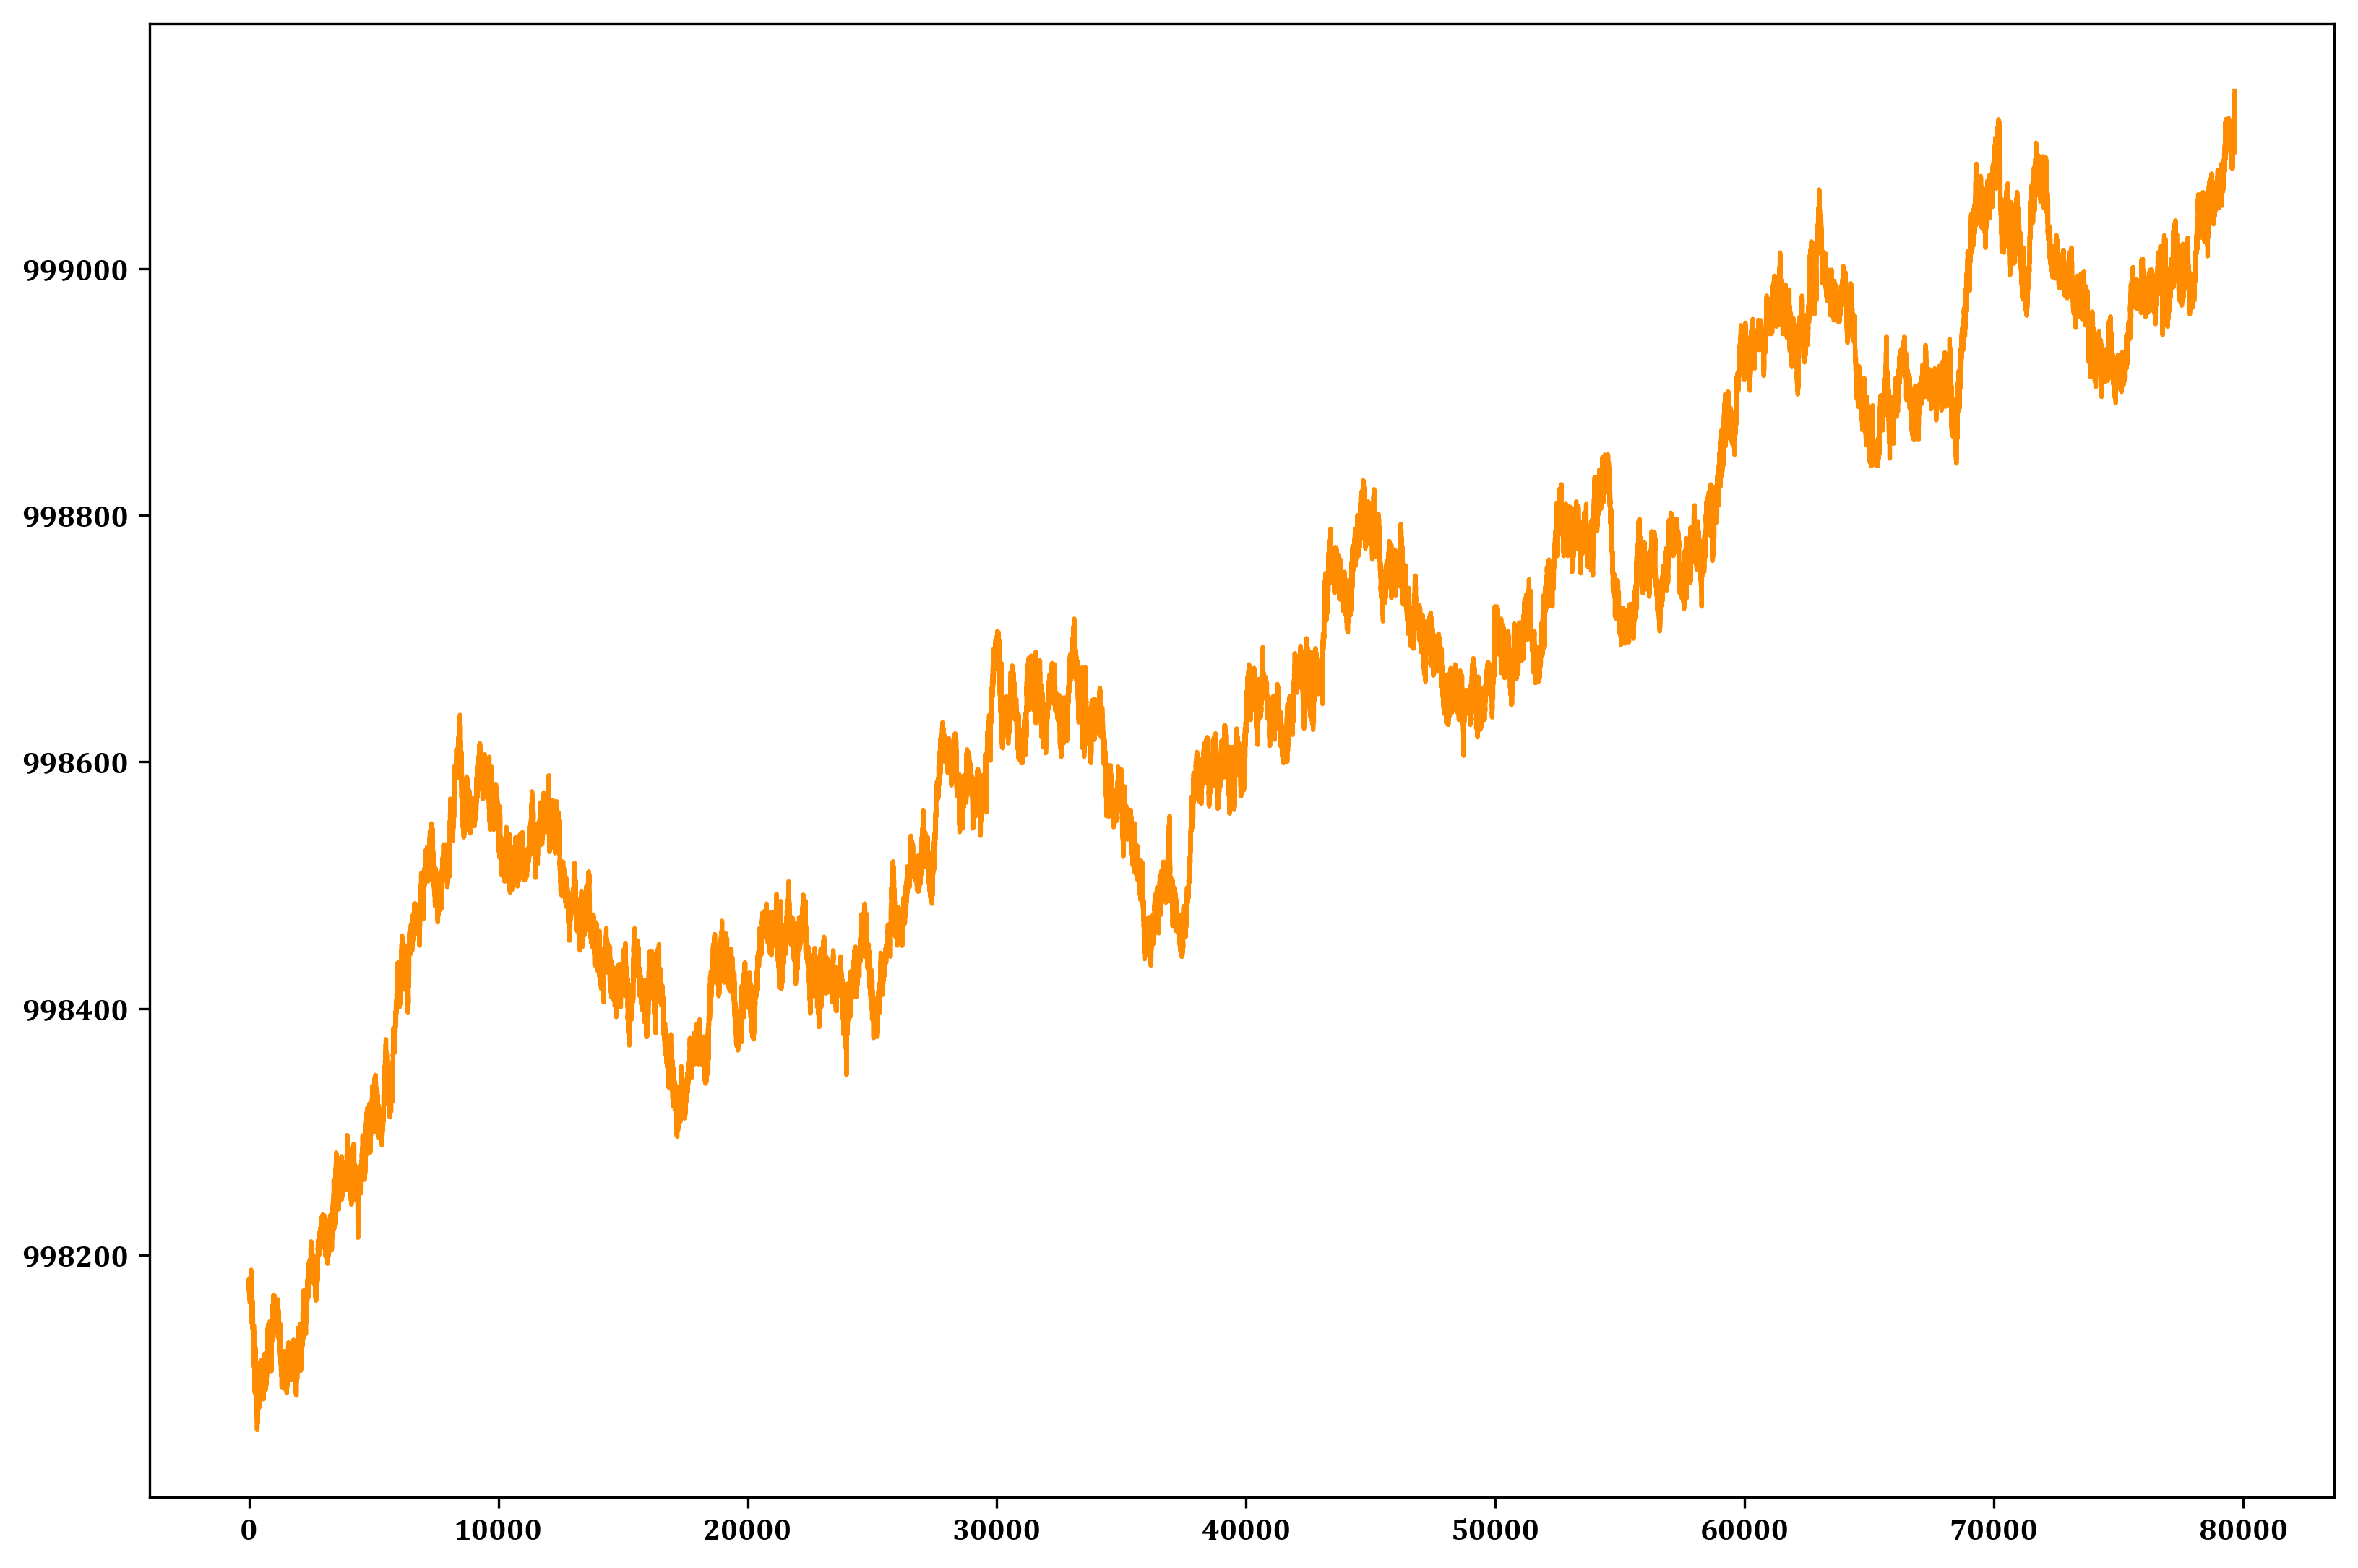

In [10]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(trade_df.loc[:, 'price'], linestyle='solid', color='DarkOrange', marker='None', label='Price')
plt.show()